In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("C:\Data science project\Clean_Dataset.xls")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df = df.drop(['Unnamed: 0','flight'],axis = 1)

In [4]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

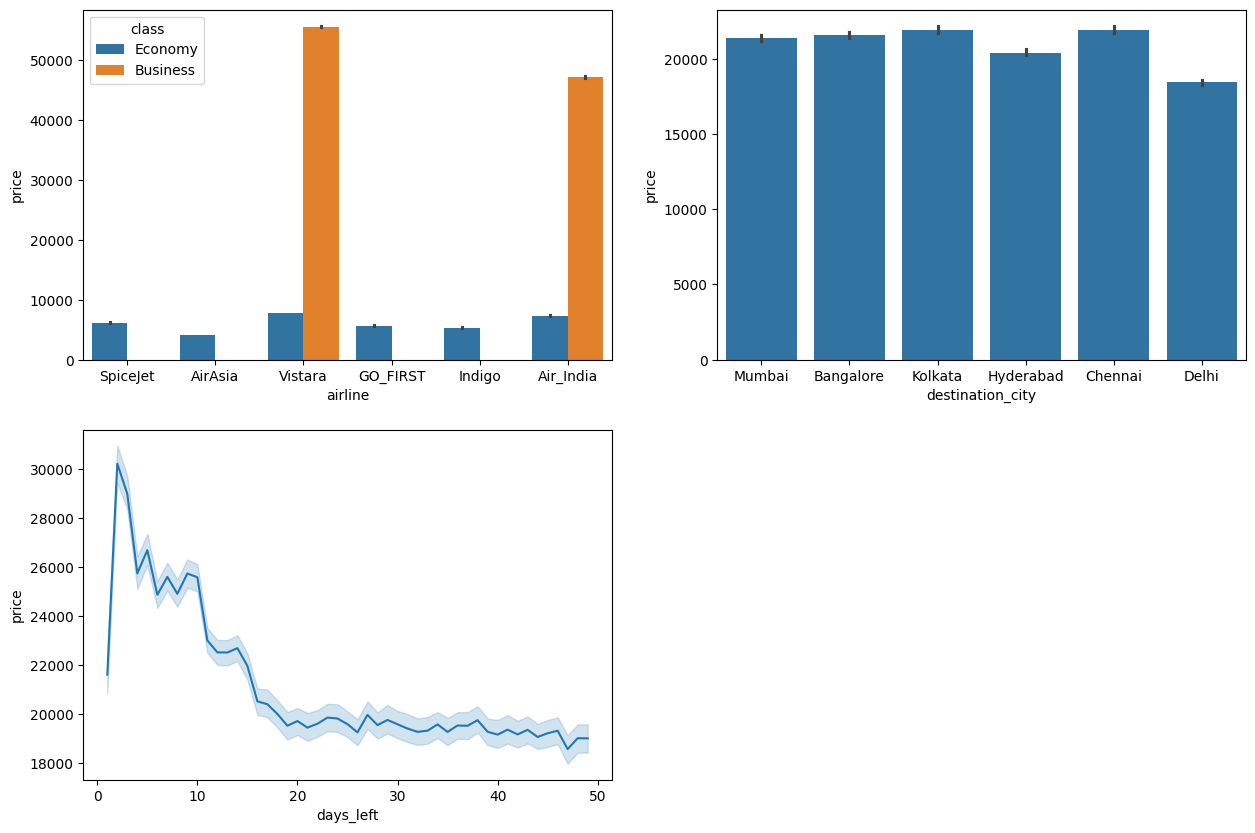

In [7]:
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.barplot(x = 'airline' , y = 'price',data = df,hue = 'class')
plt.subplot(222)
sns.barplot(x = 'destination_city', y ='price', data = df)
plt.subplot(223)
sns.lineplot(x = 'days_left',y = 'price', data = df)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df.airline = la.fit_transform(df.airline)
df.source_city = la.fit_transform(df.source_city)
df.stops = la.fit_transform(df.stops)
df.arrival_time = la.fit_transform(df.arrival_time)
df.destination_city = la.fit_transform(df.destination_city)
df['class'] = la.fit_transform(df['class'])
df.departure_time = la.fit_transform(df.departure_time)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [9]:
la = LabelEncoder()
la.fit(df['airline'])
la_dic = dict(zip((la.classes_),la.transform(la.classes_)))
la_dic = {k: int(v) for k, v in la_dic.items()}
la_dic

{np.int64(0): 0,
 np.int64(1): 1,
 np.int64(2): 2,
 np.int64(3): 3,
 np.int64(4): 4,
 np.int64(5): 5}

In [10]:
x = df.iloc[:,:-1]
y = df.price
x,y

(        airline  source_city  departure_time  stops  arrival_time  \
 0             4            2               2      2             5   
 1             4            2               1      2             4   
 2             0            2               1      2             1   
 3             5            2               4      2             0   
 4             5            2               4      2             4   
 ...         ...          ...             ...    ...           ...   
 300148        5            1               4      0             2   
 300149        5            1               0      0             5   
 300150        5            1               1      0             5   
 300151        5            1               1      0             2   
 300152        5            1               4      0             2   
 
         destination_city  class  duration  days_left  
 0                      5      1      2.17          1  
 1                      5      1      2.33    

In [11]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.2,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth= 20)
model.fit(train_x,train_y)
model.score(test_x,test_y),model.score(train_x,train_y)

(0.9778674403498743, 0.9946104837056889)

In [13]:
model.fit(x,y)

DecisionTreeRegressor(max_depth=20)

In [14]:
import pickle
pickle.dump(model,open('price.pkl','wb'))

In [15]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(train_x,train_y)
model1.score(test_x,test_y),model1.score(train_x,train_y)

(0.9849711621167985, 0.9974862897257455)

In [20]:
from sklearn.ensemble import VotingRegressor
models = [('model',DecisionTreeRegressor()),('model1',RandomForestRegressor())]
vr = VotingRegressor(estimators = models)
vr.fit(train_x,train_y)
vr.score(test_x,test_y),vr.score(train_x,train_y)

(0.9820857864770438, 0.9988378088265107)